In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import wfdb
import ast

In [2]:
def load_raw_data(df, sampling_rate, path):
    '''
    função para carregar os dados originais
    '''
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
path = ''
sampling_rate=100

In [4]:
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [5]:
X = load_raw_data(Y, sampling_rate, path)

In [6]:
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.rhythm == 1]

In [8]:
agg_df.shape

(12, 12)

In [8]:
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
SR,sinus rhythm,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus rhythm,20.0,MDC_ECG_RHY_SINUS_RHY,NaN,NaN
AFIB,atrial fibrillation,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial fibrillation,50.0,MDC_ECG_RHY_ATR_FIB,NaN,D3-31520
STACH,sinus tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus tachycardia,21.0,MDC_ECG_RHY_SINUS_TACHY,NaN,NaN
SARRH,sinus arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus arrhythmia,23.0,MDC_ECG_RHY_SINUS_ARRHY,NaN,NaN
SBRAD,sinus bradycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus bradycardia,22.0,MDC_ECG_RHY_SINUS_BRADY,NaN,NaN
PACE,normal functioning artificial pacemaker,NaN,NaN,1.0,NaN,NaN,Pacemaker types and pacemaker function,normal functioning artificial pacemaker,NaN,NaN,NaN,NaN
SVARR,supraventricular arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular arrhythmia,NaN,NaN,NaN,NaN
BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290


In [9]:
agg_df['rhythm_statement'] = agg_df.index

In [10]:
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code,rhythm_statement
SR,sinus rhythm,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus rhythm,20.0,MDC_ECG_RHY_SINUS_RHY,NaN,NaN,SR
AFIB,atrial fibrillation,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial fibrillation,50.0,MDC_ECG_RHY_ATR_FIB,NaN,D3-31520,AFIB
STACH,sinus tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus tachycardia,21.0,MDC_ECG_RHY_SINUS_TACHY,NaN,NaN,STACH
SARRH,sinus arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus arrhythmia,23.0,MDC_ECG_RHY_SINUS_ARRHY,NaN,NaN,SARRH
SBRAD,sinus bradycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus bradycardia,22.0,MDC_ECG_RHY_SINUS_BRADY,NaN,NaN,SBRAD
PACE,normal functioning artificial pacemaker,NaN,NaN,1.0,NaN,NaN,Pacemaker types and pacemaker function,normal functioning artificial pacemaker,NaN,NaN,NaN,NaN,PACE
SVARR,supraventricular arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular arrhythmia,NaN,NaN,NaN,NaN,SVARR
BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN,BIGU
AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN,AFLT
SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290,SVTAC


In [11]:
def aggregate_rhythm(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].rhythm_statement)
    return list(set(tmp))

In [12]:
YI = Y.copy()

In [13]:
YI.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [14]:
YI['scp_codes']

ecg_id
1                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                             {'NORM': 80.0, 'SBRAD': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
5                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21833    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21834             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21835                           {'ISCAS': 50.0, 'SR': 0.0}
21836                           {'NORM': 100.0, 'SR': 0.0}
21837                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21837, dtype: object

In [15]:
YI['heart_axis']

ecg_id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
21833    LAD
21834    MID
21835    MID
21836    LAD
21837    MID
Name: heart_axis, Length: 21837, dtype: object

In [16]:
YI['infarction_stadium1']

ecg_id
1                   NaN
2                   NaN
3                   NaN
4                   NaN
5                   NaN
              ...      
21833               NaN
21834    Stadium II-III
21835               NaN
21836               NaN
21837               NaN
Name: infarction_stadium1, Length: 21837, dtype: object

In [17]:
YI['infarction_stadium2']

ecg_id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
21833    NaN
21834    NaN
21835    NaN
21836    NaN
21837    NaN
Name: infarction_stadium2, Length: 21837, dtype: object

In [19]:
YI['validated_by']

ecg_id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
21833    1.0
21834    1.0
21835    1.0
21836    1.0
21837    1.0
Name: validated_by, Length: 21837, dtype: float64

In [20]:
YI['second_opinion']

ecg_id
1        False
2        False
3        False
4        False
5        False
         ...  
21833    False
21834    False
21835     True
21836    False
21837    False
Name: second_opinion, Length: 21837, dtype: bool

In [21]:
YI['initial_autogenerated_report']

ecg_id
1        False
2        False
3        False
4        False
5        False
         ...  
21833     True
21834     True
21835     True
21836     True
21837     True
Name: initial_autogenerated_report, Length: 21837, dtype: bool

In [22]:
YI['validated_by_human']

ecg_id
1        True
2        True
3        True
4        True
5        True
         ... 
21833    True
21834    True
21835    True
21836    True
21837    True
Name: validated_by_human, Length: 21837, dtype: bool

In [23]:
YI['baseline_drift']

ecg_id
1                   NaN
2                   NaN
3                   NaN
4          , II,III,AVF
5         , III,AVR,AVF
              ...      
21833               NaN
21834               NaN
21835               NaN
21836               NaN
21837               NaN
Name: baseline_drift, Length: 21837, dtype: object

In [24]:
YI['static_noise']

ecg_id
1          , I-V1,  
2                NaN
3                NaN
4                NaN
5                NaN
            ...     
21833     , alles,  
21834            NaN
21835     , I-AVR,  
21836            NaN
21837     , I-AVL,  
Name: static_noise, Length: 21837, dtype: object

In [25]:
YI['burst_noise']

ecg_id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
21833    NaN
21834    NaN
21835    NaN
21836    NaN
21837    NaN
Name: burst_noise, Length: 21837, dtype: object

In [26]:
YI['electrodes_problems']

ecg_id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
21833    NaN
21834    NaN
21835    NaN
21836    NaN
21837    NaN
Name: electrodes_problems, Length: 21837, dtype: object

In [27]:
YI['extra_beats']

ecg_id
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
         ... 
21833     1ES
21834     NaN
21835     NaN
21836    SVES
21837     NaN
Name: extra_beats, Length: 21837, dtype: object

In [28]:
YI['pacemaker']

ecg_id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
21833    NaN
21834    NaN
21835    NaN
21836    NaN
21837    NaN
Name: pacemaker, Length: 21837, dtype: object

In [29]:
YI['strat_fold']

ecg_id
1        3
2        2
3        5
4        3
5        4
        ..
21833    7
21834    4
21835    2
21836    8
21837    9
Name: strat_fold, Length: 21837, dtype: int64

In [30]:
YI['rhythm_class'] = YI.scp_codes.apply(aggregate_rhythm)

In [31]:
YI.shape

(21837, 28)

In [16]:
YI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21837 entries, 1 to 21837
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21837 non-null  float64
 1   age                           21748 non-null  float64
 2   sex                           21837 non-null  int64  
 3   height                        6983 non-null   float64
 4   weight                        9429 non-null   float64
 5   nurse                         20328 non-null  float64
 6   site                          21819 non-null  float64
 7   device                        21837 non-null  object 
 8   recording_date                21837 non-null  object 
 9   report                        21837 non-null  object 
 10  scp_codes                     21837 non-null  object 
 11  heart_axis                    13332 non-null  object 
 12  infarction_stadium1           5626 non-null   object 
 13  i

In [32]:
YI['rhythm_class'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[SR]                 16721
[AFIB]                1484
[STACH]                805
[]                     771
[SARRH]                765
[SBRAD]                629
[PACE]                 287
[SVARR]                150
[SR, BIGU]              37
[AFLT]                  36
[BIGU]                  22
[AFIB, AFLT]            17
[BIGU, STACH]           11
[SR, TRIGU]             11
[PSVT]                  10
[SVTAC]                 10
[PSVT, SVTAC]            8
[BIGU, AFIB]             7
[AFLT, SVTAC]            6
[SR, AFLT]               5
[STACH, AFLT]            5
[AFLT, SVARR]            4
[TRIGU]                  4
[TRIGU, STACH]           4
[PACE, AFIB]             4
[PACE, SR]               3
[SBRAD, SARRH]           3
[SBRAD, BIGU]            3
[PACE, SBRAD]            2
[PSVT, SVARR]            2
[SR, SARRH]              2
[BIGU, SARRH]            2
[SR, PSVT]               1
[TRIGU, SVARR]           1
[SR, SVTAC]              1
[AFIB, PSVT]             1
[AFIB, SVTAC]            1
[

In [33]:
def get_diag(x_lst):
    if 'SR' in x_lst:
        diag = 'SR'
    elif 'AFIB' in x_lst:
        diag = 'AFIB'
    else:
        diag = 'OTHER'
    return diag

In [34]:
YI['rhythm_diag'] = YI.rhythm_class.apply(get_diag)

In [35]:
YI.head(10)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,rhythm_class,rhythm_diag
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[SR],SR
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[SBRAD],OTHER
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[SR],SR
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[SR],SR
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[SR],SR
6,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr,[SR],SR
7,16193.0,54.0,0,NaN,83.0,2.0,0.0,CS-12 E,1984-11-28 13:32:22,"sinusrhythmus linkstyp t abnormal, wahrscheinl...",...,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00007_lr,records500/00000/00007_hr,[SR],SR
8,11275.0,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,1984-12-01 14:49:52,sinusrhythmus linkstyp qrs(t) abnormal infe...,...,", I-AVF,",NaN,NaN,NaN,NaN,9,records100/00000/00008_lr,records500/00000/00008_hr,[SR],SR
9,18792.0,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-12-08 09:44:43,sinusrhythmus normales ekg,...,", I-AVR,",NaN,NaN,NaN,NaN,10,records100/00000/00009_lr,records500/00000/00009_hr,[SR],SR


In [36]:
YI.rhythm_diag.value_counts()

SR       16782
OTHER     3541
AFIB      1514
Name: rhythm_diag, dtype: int64

In [37]:
YI[YI.rhythm_diag == 'SR'].pacemaker.value_counts()

ja, nan          3
PACE????, nan    2
ja, pacemaker    1
?, nan           1
Name: pacemaker, dtype: int64

In [38]:
YI[YI.rhythm_diag == 'AFIB'].pacemaker.value_counts()

ja, pacemaker    3
Name: pacemaker, dtype: int64

In [39]:
YI[YI.rhythm_diag == 'SR'].electrodes_problems.value_counts()

V6                          5
V4                          4
Elektroden vertauscht???    1
V3,V4-V6                    1
Kontaktprobleme aVL ???     1
V1                          1
I???                        1
V1???                       1
V5                          1
V5,V6                       1
v6????                      1
Name: electrodes_problems, dtype: int64

In [40]:
YI[YI.rhythm_diag == 'AFIB'].electrodes_problems.value_counts()

V1    1
Name: electrodes_problems, dtype: int64

In [41]:
YI[YI.rhythm_diag == 'SR'].static_noise.value_counts()

 , I-AVR,             785
 , I-AVF,             737
 , alles,             350
 , I-V1,              115
 , I-V2,              104
                     ... 
 , I,III-AVF,           1
 , AVL,V2,              1
 , I,II,AVL,AVF,        1
 , I,V2,                1
 , I,II,V5,             1
Name: static_noise, Length: 104, dtype: int64

In [42]:
YI[YI.rhythm_diag == 'AFIB'].static_noise.value_counts()

 , alles,                     69
 , I-AVF,                     65
 , I-AVR,                     38
 , I-V1,                      22
 , I-V2,                      21
 , mittel,                     8
 , leicht,                     6
 , I-AVL,                      5
 , alles, noisy recording,     4
 , noisy recording,            2
 , V6,                         2
 , I-V3,                       2
 , I,II,                       2
I,III,AVF,AVL,V2,  ,           1
 , I,II,III,AVL,               1
 , I -AVF,                     1
V1,  ,                         1
 , stark,                      1
 , V2,                         1
 , I,III,V5,                   1
 , I,                          1
 , I - AVR,                    1
 , I,II,AVL,AVR,               1
 , I - AVF,                    1
 , I,II,AVL-AVF,               1
 , noise,                      1
 , I,II,AVR,                   1
 , V1,V2,                      1
 , I,II,AVR,V1,                1
 , V5,V6,                      1
 , V1,    

In [43]:
YI[YI.rhythm_diag == 'SR'].burst_noise.value_counts()

alles          93
I-AVF          41
V2             18
V1             18
I-AVR          18
               ..
III,AVL         1
                1
v3,4            1
I,II,AVL-V2     1
I-AVL           1
Name: burst_noise, Length: 78, dtype: int64

In [29]:
YI[YI.rhythm_diag == 'AFIB'].burst_noise.value_counts()

V1              27
V1,V2           25
alles           22
I-V1             7
I-V2             5
I-V3             4
v6               3
I-AVF            3
I-V5             2
II               2
V2               2
II,III,V1,V2     2
II,V1,V2         1
V1-V5            1
I,II,V1          1
v4,6             1
II-V1            1
v3               1
II-AVL,V1,V2     1
v1,2             1
V3               1
alle             1
V1-V6            1
V1-V4            1
v1-6             1
III,V1           1
V1,V5            1
I,III,AVL        1
I,II             1
v4, v5           1
V1,V2,V5         1
Name: burst_noise, dtype: int64

In [44]:
YI[YI.rhythm_diag == 'OTHER'][['age', 'sex', 'height', 'weight']].describe()

,age,sex,height,weight
count,3527.000000,3541.000000,871.000000,1153.000000
mean,60.394386,0.460322,166.688863,69.849089
std,18.631243,0.498494,11.660952,16.141242
min,4.000000,0.000000,6.000000,20.000000
25%,50.000000,0.000000,160.000000,59.000000
50%,64.000000,0.000000,168.000000,69.000000
75%,74.000000,1.000000,174.000000,79.000000
max,95.000000,1.000000,192.000000,185.000000


In [45]:
df_afib = YI[YI.rhythm_diag == 'AFIB'][['age', 'sex', 'height', 'weight']]
df_sr = YI[YI.rhythm_diag == 'SR'][['age', 'sex', 'height', 'weight']]

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


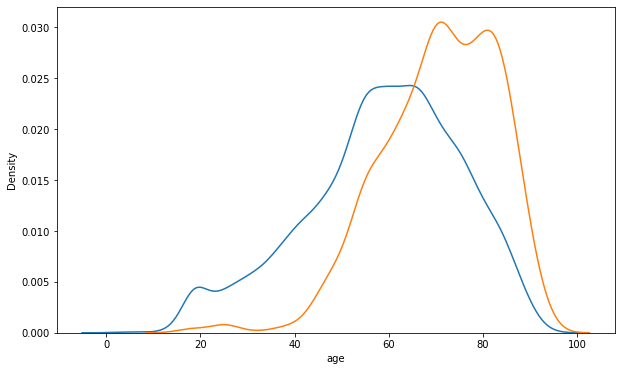

In [46]:
plt.figure(figsize=(10, 6))
sns.distplot(df_sr['age'], hist=False, label='SR')
sns.distplot(df_afib['age'], hist=False, label='AFIB');

In [7]:
def aggregate_rhythm(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [8]:
def aggregate_rhythm_2(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].rhythm_class)
    return list(set(tmp))

In [9]:
YI = Y.copy()

In [10]:
YI['rhythm_class'] = Y.scp_codes.apply(aggregate_rhythm)

In [11]:
YI.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,rhythm_class
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[nan]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[nan]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[nan]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[nan]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[nan]


In [12]:
Y2 = Y.copy()

In [13]:
YI['rhythm_class'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[nan]    21066
[]         771
Name: rhythm_class, dtype: int64

In [14]:
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
SR,sinus rhythm,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus rhythm,20.0,MDC_ECG_RHY_SINUS_RHY,NaN,NaN
AFIB,atrial fibrillation,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial fibrillation,50.0,MDC_ECG_RHY_ATR_FIB,NaN,D3-31520
STACH,sinus tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus tachycardia,21.0,MDC_ECG_RHY_SINUS_TACHY,NaN,NaN
SARRH,sinus arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus arrhythmia,23.0,MDC_ECG_RHY_SINUS_ARRHY,NaN,NaN
SBRAD,sinus bradycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus bradycardia,22.0,MDC_ECG_RHY_SINUS_BRADY,NaN,NaN
PACE,normal functioning artificial pacemaker,NaN,NaN,1.0,NaN,NaN,Pacemaker types and pacemaker function,normal functioning artificial pacemaker,NaN,NaN,NaN,NaN
SVARR,supraventricular arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular arrhythmia,NaN,NaN,NaN,NaN
BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290


In [15]:
def aggregate_rhythm(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].description)
    return list(set(tmp))

In [16]:
Y3 = Y.copy()
Y3['rhythm_class'] = Y.scp_codes.apply(aggregate_rhythm)

In [17]:
Y3.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,rhythm_class
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[sinus rhythm]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[sinus bradycardia]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[sinus rhythm]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[sinus rhythm]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[sinus rhythm]


In [18]:
Y3['rhythm_class'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[sinus rhythm]                                                                           16721
[atrial fibrillation]                                                                     1484
[sinus tachycardia]                                                                        805
[]                                                                                         771
[sinus arrhythmia]                                                                         765
[sinus bradycardia]                                                                        629
[normal functioning artificial pacemaker]                                                  287
[supraventricular arrhythmia]                                                              150
[sinus rhythm, bigeminal pattern (unknown origin, SV or Ventricular)]                       37
[atrial flutter]                                                                            36
[bigeminal pattern (unknown origin, SV or Ventricu

In [20]:
Y3.shape

(21837, 28)

In [25]:
X.shape

(21837, 1000, 12)

In [26]:
X[0,0,1]

-0.055

In [32]:
Y3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21837 entries, 1 to 21837
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21837 non-null  float64
 1   age                           21748 non-null  float64
 2   sex                           21837 non-null  int64  
 3   height                        6983 non-null   float64
 4   weight                        9429 non-null   float64
 5   nurse                         20328 non-null  float64
 6   site                          21819 non-null  float64
 7   device                        21837 non-null  object 
 8   recording_date                21837 non-null  object 
 9   report                        21837 non-null  object 
 10  scp_codes                     21837 non-null  object 
 11  heart_axis                    13332 non-null  object 
 12  infarction_stadium1           5626 non-null   object 
 13  i